<a href="https://colab.research.google.com/github/divya042003/Heart_Disease_detection/blob/main/Heart_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

perform the analysis on the a health care dataset related to heart disease topredict the cause of heart disease using simple linear logistic linear regression algo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report
import seaborn as sns

In [3]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


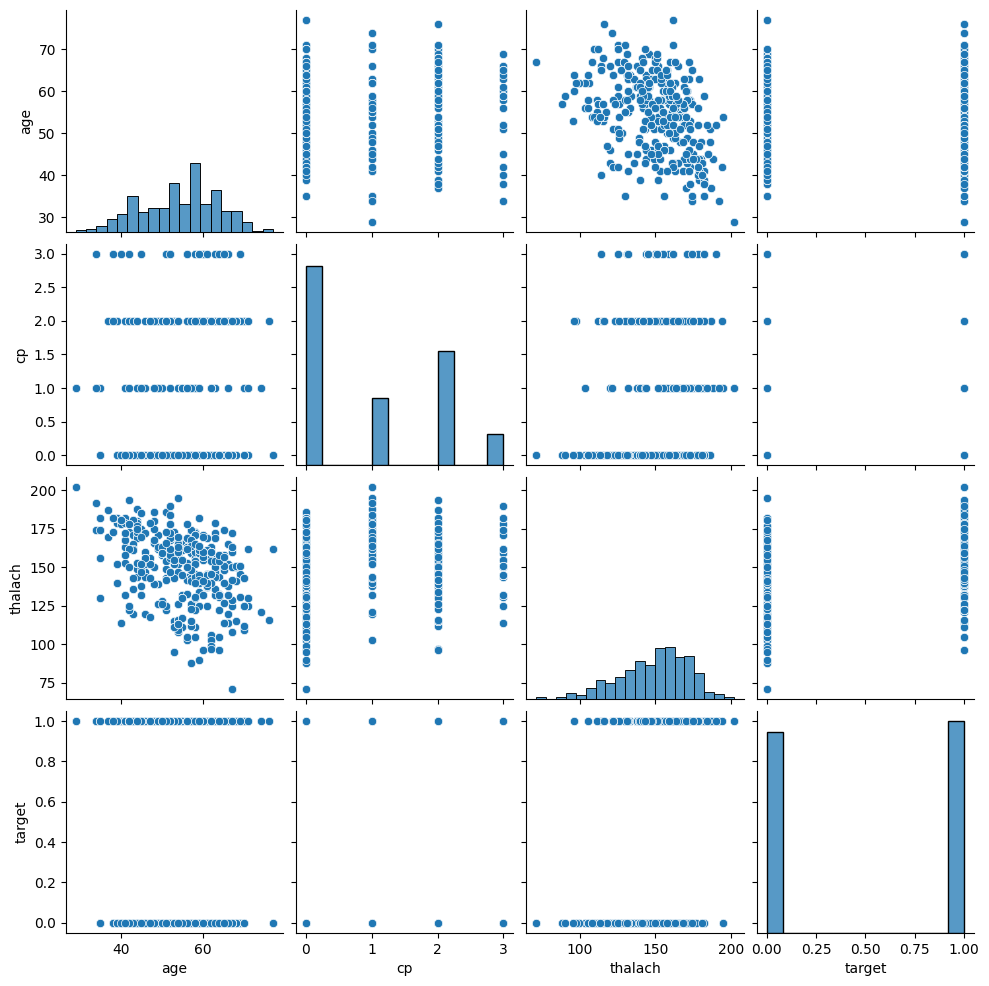

In [5]:
sns.pairplot(df[['age','cp','thalach','target']])

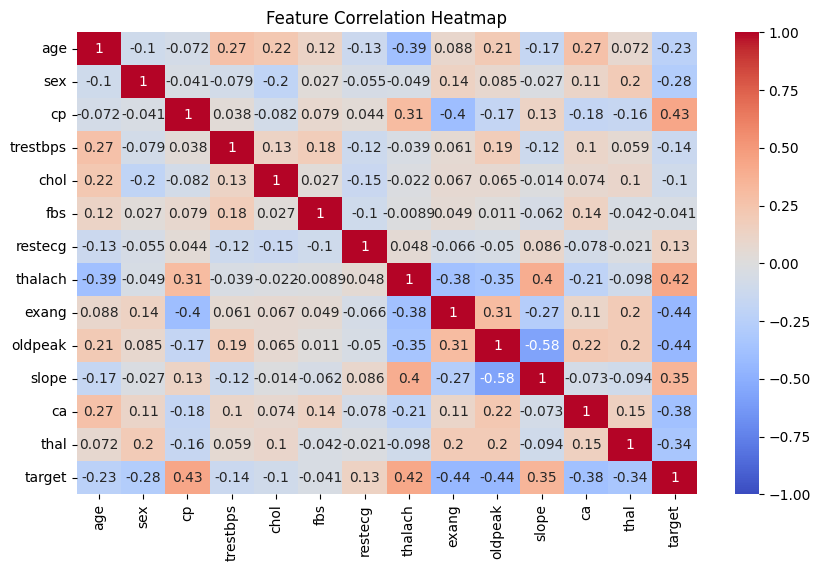

In [6]:
import matplotlib.pyplot as plt # Make sure matplotlib.pyplot is imported
import seaborn as sns
import pandas as pd
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

In [7]:
x=df[['age','cp','thalach']]
y=df['target']

In [8]:
X_train,X_test,y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [9]:
y_pred=model.predict(X_test)
print(y_pred)

[0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0
 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1
 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1
 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1]


In [10]:
y_prob=model.predict_proba(X_test)[:,1]
print(y_prob)

[0.40131437 0.43356962 0.30047039 0.66877357 0.38530369 0.19047458
 0.05445523 0.14693847 0.88307793 0.12054732 0.75840063 0.24273973
 0.71709981 0.8448053  0.09072211 0.71768499 0.23243963 0.84213946
 0.80891513 0.18294537 0.40108323 0.26444028 0.59955179 0.18486255
 0.40108323 0.90332128 0.67561348 0.84467912 0.32071642 0.46086684
 0.56020256 0.6804266  0.72595906 0.43356962 0.66939742 0.63825977
 0.40108323 0.28026708 0.11756517 0.76124598 0.14693847 0.20056296
 0.2127672  0.59955179 0.29016576 0.11287433 0.66935088 0.36894625
 0.70467953 0.57259986 0.84538952 0.18738052 0.63995486 0.39404264
 0.67561348 0.11756517 0.44677174 0.18962892 0.88504887 0.798946
 0.94070443 0.45786405 0.32071642 0.57259986 0.06355642 0.36168433
 0.91841124 0.64875234 0.11287433 0.81578295 0.50455427 0.32071642
 0.39099668 0.75111682 0.41613518 0.70043043 0.05445523 0.67197503
 0.43834992 0.74137609 0.51581346 0.41326812 0.13622455 0.2741842
 0.36680576 0.17686591 0.75840063 0.17276423 0.51581346 0.4608668

In [11]:
print(f"Accuracy:[accuracy_score(y_test,y_pred):2f]")
print("classification report:")
print(classification_report(Y_test,y_pred))


Accuracy:[accuracy_score(y_test,y_pred):2f]
classification report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       102
           1       0.72      0.73      0.72       103

    accuracy                           0.72       205
   macro avg       0.72      0.72      0.72       205
weighted avg       0.72      0.72      0.72       205



In [12]:
# User input function for prediction
def predict_heart_disease():
    age = int(input("Enter age: "))
    cp = int(input("Enter chest pain type (0-3): "))
    thalach = int(input("Enter maximum heart rate achieved: "))

    user_data = pd.DataFrame([[age, cp, thalach]], columns=['age', 'cp', 'thalach'])
    prediction = model.predict(user_data)

    result = "Heart Disease Present" if prediction[0] == 1 else "No Heart Disease"
    print(f"Prediction: {result}")

# Call the user input function to test
predict_heart_disease()

Enter age: 34
Enter chest pain type (0-3): 2
Enter maximum heart rate achieved: 95
Prediction: No Heart Disease
